In [1]:
# !pip install nilearn decord

In [2]:
%cd /content/drive/MyDrive/algonauts

/content/drive/MyDrive/algonauts


In [3]:
import os
import glob
import random
import urllib

import torch
import numpy as np
import matplotlib.pyplot as plt

from src.features import *
from src.encoding import *
from src.utils import *

In [4]:
SEED = 42

torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)

np.random.seed(SEED)
random.seed(SEED)

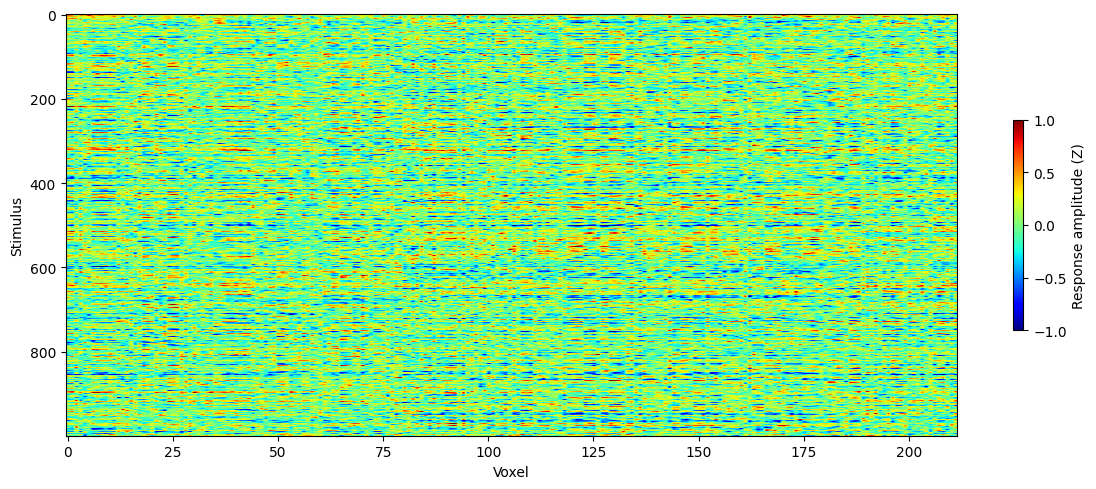

In [5]:
sub = 'sub04' 
ROI = 'V3'

fmri_dir = '/content/drive/MyDrive/algonauts/participants_data_v2021' 
if ROI == "WB":
    track = "full_track"
else:
    track = "mini_track"
results_dir = '/content/'
track_dir = os.path.join(fmri_dir, track) 
sub_fmri_dir = os.path.join(track_dir, sub)
if track == "full_track":
    fmri_train_all,voxel_mask = get_fmri(sub_fmri_dir,ROI)
else:
    fmri_train_all = get_fmri(sub_fmri_dir,ROI)

f, ax = plt.subplots(figsize=(12, 5))
ax.set(xlabel="Voxel", ylabel="Stimulus")
heatmap = ax.imshow(fmri_train_all, aspect="auto",cmap='jet',vmin=-1,vmax=1)
f.colorbar(heatmap, shrink=.5, label="Response amplitude (Z)")
f.tight_layout()

In [6]:
vid_id = 266
video_dir = '/content/drive/MyDrive/algonauts/AlgonautsVideos268_All_30fpsmax'

# Video display
video_list = glob.glob(video_dir + '/*.mp4')
video_list.sort()

from IPython.display import HTML
from base64 import b64encode

mp4 = open(video_list[vid_id],'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
    <source src="%s" type="video/mp4">
</video>
""" % data_url)

(78, 93, 71)


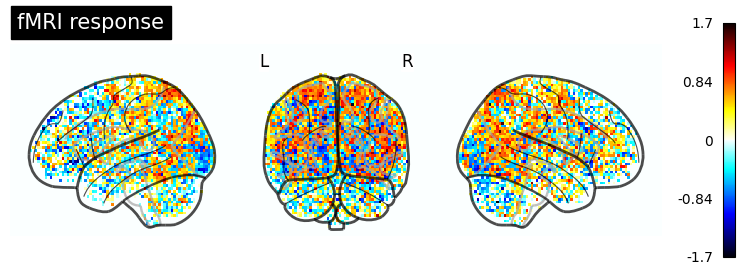

In [7]:
visualize_activity(vid_id, sub)

In [8]:
video_dir = './AlgonautsVideos268_All_30fpsmax'
video_list = glob.glob(video_dir + '/*.mp4')
video_list.sort()
print('Total Number of Videos:', len(video_list))

Total Number of Videos: 1102


In [9]:
save_dir = "/content/activations_alexnet"
checkpoint_path = "/content/alexnet.pth"

if not os.path.exists(checkpoint_path):
    url = "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth"
    urllib.request.urlretrieve(url, "/content/alexnet.pth")
model = load_alexnet(checkpoint_path)

In [10]:
activations_dir = os.path.join(save_dir)
if not os.path.exists(activations_dir):
    os.makedirs(activations_dir)
print("-------------Saving activations ----------------------------")
get_activations_and_save(model, video_list, activations_dir)

In [11]:
pca_dir = os.path.join(save_dir, 'pca_100')
print("-------------performing  PCA----------------------------")
PCA_and_save(8, activations_dir, pca_dir)

In [12]:
sub = 'sub06'
ROI = 'V3'
layer = 'layer_7'

fmri_dir = './participants_data_v2021'
prediction_dir = '/content/prediction'
model = 'alexnet'

if ROI == "WB":
    track = "full_track"
else:
    track = "mini_track"

results_dir = os.path.join(prediction_dir, model, layer, track, sub)
if not os.path.exists(results_dir):
    os.makedirs(results_dir)

In [13]:
perform_encoding(activations_dir, fmri_dir, results_dir, sub, layer, ROI=ROI)

----------------------------------------------------------------------------
Mean correlation for ROI :  V3 in  sub06  using  layer_7  is : 0.101745


In [14]:
subs = ["sub01","sub02","sub03","sub04","sub05","sub06","sub07","sub08","sub09","sub10"]  
ROIs = ["WB", "V1", "V2","V3", "V4", "LOC", "EBA", "FFA","STS", "PPA"]
layer = 'layer_5'
model = 'alexnet'
for sub in subs:
    for ROI in ROIs:
        if ROI == "WB":
            track = "full_track"
        else:
            track = "mini_track"
        results_dir = os.path.join(prediction_dir, model, layer, track, sub)
        if not os.path.exists(results_dir):
            os.makedirs(results_dir)
        print ("Starting ROI: ", ROI, "sub: ", sub)
        perform_encoding(activations_dir, fmri_dir, results_dir, sub, layer, ROI=ROI, mode='test')
        print ("Completed ROI: ", ROI, "sub: ",sub)
        print("----------------------------------------------------------------------------")

Starting ROI:  WB sub:  sub01
Completed ROI:  WB sub:  sub01
----------------------------------------------------------------------------
Starting ROI:  V1 sub:  sub01
Completed ROI:  V1 sub:  sub01
----------------------------------------------------------------------------
Starting ROI:  V2 sub:  sub01
Completed ROI:  V2 sub:  sub01
----------------------------------------------------------------------------
Starting ROI:  V3 sub:  sub01
Completed ROI:  V3 sub:  sub01
----------------------------------------------------------------------------
Starting ROI:  V4 sub:  sub01
Completed ROI:  V4 sub:  sub01
----------------------------------------------------------------------------
Starting ROI:  LOC sub:  sub01
Completed ROI:  LOC sub:  sub01
----------------------------------------------------------------------------
Starting ROI:  EBA sub:  sub01
Completed ROI:  EBA sub:  sub01
----------------------------------------------------------------------------
Starting ROI:  FFA sub:  sub01